<h1 style="text-align: center;">Deep Learning<br><br>Session - 8<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project Solution<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [11]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
from google.colab import drive
drive.mount('/content/drive')
# The code above creates a folder named "drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
# The code above creates a folder named "data" unzipping cat_dog_data.zip

In [16]:
# import gdown
# url = 'https://drive.google.com/u/0/uc?id=1Qm7Lp95C9E9mqUD1m8LNf_UkfctXvEGB&export=download'
# output = 'cat_dog_data.zip' # colab
# gdown.download(url, output, quiet=False)
# !unzip  -oq $output

# Recognizing and Understanding Data

In [19]:
my_data_dir = 'data'

In [22]:
# Check what's in the directory my_data_dir
os.listdir(my_data_dir)

['train', 'validation', 'test']

In [23]:
# Define the paths of folders in the directory my_data_dir
val_path = my_data_dir+'/validation/'  # /content/data/validation
train_path = my_data_dir+'/train/'  # /content/data/train 
test_path = my_data_dir+'/test/'  # /content/data/test

total_test = len(os.listdir(test_path))
total_train = len(os.listdir(train_path+'dog')) + len(os.listdir(train_path+'cat'))
total_validation = len(os.listdir(val_path+'dog')) + len(os.listdir(val_path+'cat'))

print(f'''Test size: {total_test:>12}
Train size: {total_train:>12}
Validation size: {total_validation:<12}''')

In [24]:
# List the folders in train
os.listdir(train_path)

['cat', 'dog']

In [25]:
os.listdir(val_path)

['cat', 'dog']

In [27]:
# List the images files in test
os.listdir(test_path)[:5]

['5682.jpg', '5225.jpg', '11922.jpg', '10438.jpg', '6259.jpg']

In [28]:
# Alternative method
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


**Let's check how many images there are.**

In [31]:
# The number of cats and dog images in train
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(12500, 5026)

In [32]:
# The number of cats and dog images validation
len(os.listdir(val_path+'cat')), len(os.listdir(val_path+'dog'))

(1219, 1071)

In [33]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 12500 images in 'data/train/cat'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 0 directories and 6897 images in 'data/test'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [54]:
os.listdir(train_path+'cat')[0]

'cat.1181.jpg'

In [55]:
os.listdir(train_path+'dog')[0]


'dog.10519.jpg'

In [56]:
path1=train_path+'cat/'+os.listdir(train_path+'cat')[0]
path2=train_path+'dog/'+os.listdir(train_path+'dog')[0]

In [57]:
cat_img=imread(path1)  # Return an array
cat_img

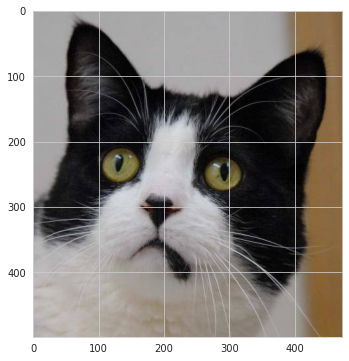

In [58]:
plt.imshow(cat_img)

In [ ]:
dog_img=imread(path2)
dog_img

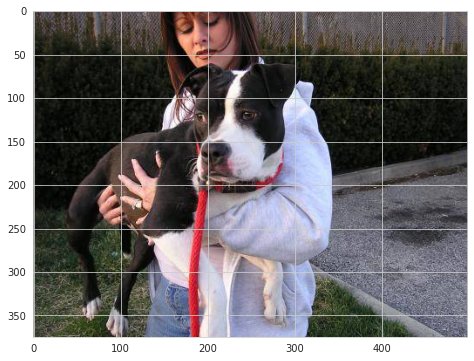

In [59]:
plt.imshow(dog_img)

In [70]:
# View an image randomly

import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0]) # return an array
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (315, 399, 3)


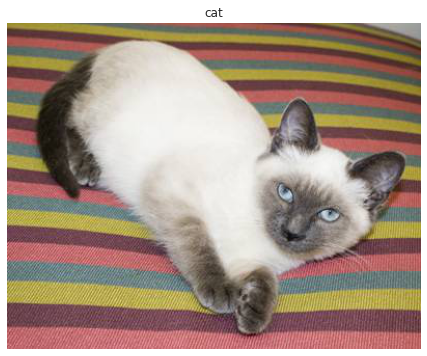

In [71]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="cat")

Image shape: (382, 499, 3)


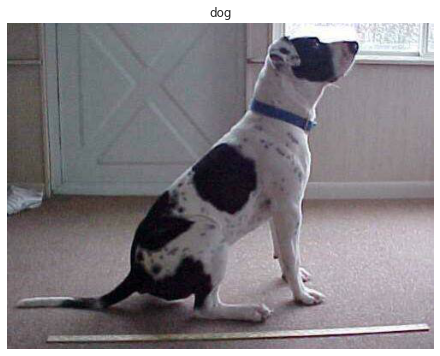

In [74]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path, target_class="dog")

Image shape: (375, 499, 3)


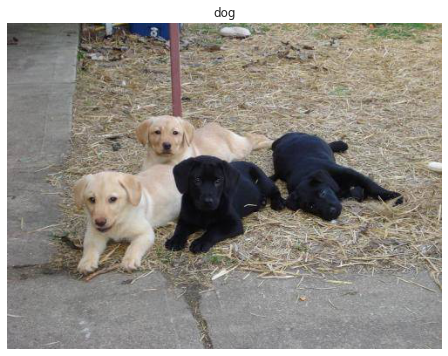

In [77]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [78]:
cat_img.shape

(499, 473, 3)

In [79]:
dog_img.shape

(375, 499, 3)

In [80]:
x = [imread(train_path+'cat/'+image).shape[0] for image in os.listdir(train_path+'cat')]
y = [imread(train_path+'cat/'+image).shape[1] for image in os.listdir(train_path+'cat')]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


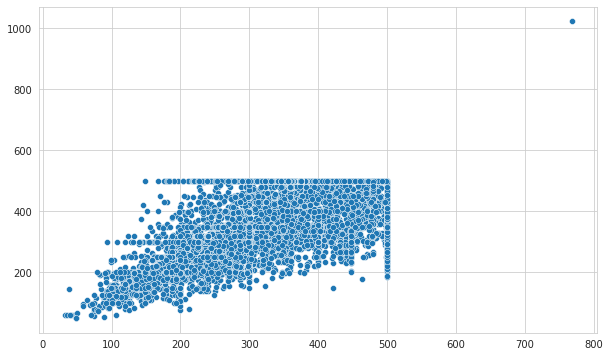

In [81]:
sns.scatterplot(x,y);

In [82]:
# mean and median for rows
np.mean(x), np.median(x)

(356.46712, 374.0)

In [83]:
# mean and median for columns
np.mean(y), np.median(y)

(410.52264, 470.0)

In [84]:
# Specify the image shape as arbitrary
image_shape = (128,128,3)  

> Reducing large images is fine, but enlarging small images can be a problem. Because when we enlarge the picture, there may be loss of feature. We should not forget that the size of the image affects the processing performance.

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [85]:
cat_img.max()

228

In [86]:
cat_img.min()

0

As we see above, images need to be scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

> Image Augmentation on the fly using Keras ImageDataGenerator is during training.

In [87]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# help(ImageDataGenerator)

In [91]:
image_gen = ImageDataGenerator(rotation_range=15,  # rotate the image 15 degrees
                               width_shift_range=0.10,  # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max, zoom in or zoom out
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [92]:
image_gen2 = ImageDataGenerator(rescale=1/255) # Rescale the image by normalzing it.
                              
                              
                              

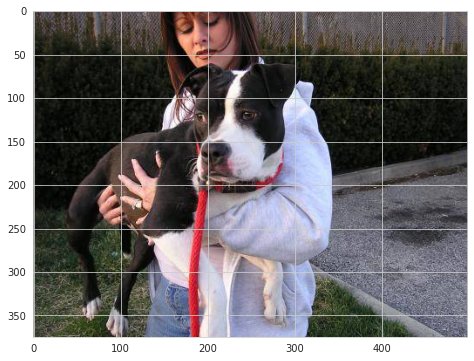

In [93]:
plt.imshow(dog_img);

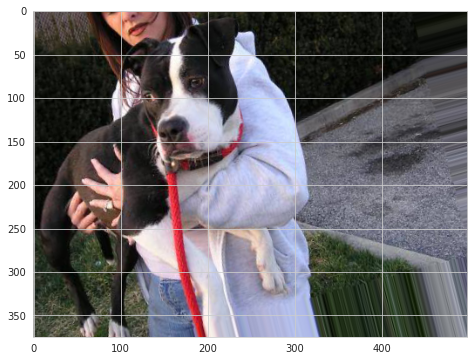

In [95]:
plt.imshow(image_gen.random_transform(dog_img));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
#help(image_gen.flow_from_directory)
#Takes the path to a directory & generates batches of augmented data.

In [99]:
# Apply image_gen to  the images in train_path 
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [100]:
image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [101]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [102]:
batch_size = 32

In [104]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',  # That means The number of channels
                                                batch_size=batch_size,
                                                class_mode='binary',  # cat or dog (not cat)
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [106]:
# Only scaling, images do not change
val_image_gen = image_gen2.flow_from_directory(directory=val_path,
                                              target_size=image_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=False)  

Found 2290 images belonging to 2 classes.


In [107]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [108]:
train_image_gen[0][0].shape

(32, 128, 128, 3)

In [109]:
len(train_image_gen), len(val_image_gen)

(548, 72)

In [113]:
len(os.listdir(train_path+'cat')) + len(os.listdir(train_path+'dog'))

17526

In [ ]:
len(train_image_gen)*batch_size, len(val_image_gen)*batch_size 

(17536, 2304)

In [116]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [119]:
images.shape,labels

((32, 128, 128, 3),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       dtype=float32))

In [120]:
# Get a sample of the testing data batch 
images, labels = val_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [134]:
model1 = Sequential()

model1.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation('relu'))

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [135]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)      

In [136]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [138]:
model1.fit(train_image_gen,
          epochs=20,
          steps_per_epoch=len(train_image_gen),  # generates as many images as in the folder,len(train_image_gen)*2
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

Epoch 1/20
548/548 [==============================] - 116s 213ms/step - loss: 0.5886 - accuracy: 0.7130 - val_loss: 0.6909 - val_accuracy: 0.5323
Epoch 2/20
548/548 [==============================] - 121s 221ms/step - loss: 0.5246 - accuracy: 0.7442 - val_loss: 0.6145 - val_accuracy: 0.6742
Epoch 3/20
548/548 [==============================] - 128s 233ms/step - loss: 0.4718 - accuracy: 0.7804 - val_loss: 0.5599 - val_accuracy: 0.7323
Epoch 4/20
548/548 [==============================] - 120s 219ms/step - loss: 0.4164 - accuracy: 0.8111 - val_loss: 0.5142 - val_accuracy: 0.7646
Epoch 5/20
548/548 [==============================] - 125s 228ms/step - loss: 0.3920 - accuracy: 0.8247 - val_loss: 0.4248 - val_accuracy: 0.7978
Epoch 6/20
548/548 [==============================] - 116s 212ms/step - loss: 0.3565 - accuracy: 0.8430 - val_loss: 0.4813 - val_accuracy: 0.7712
Epoch 7/20
548/548 [==============================] - 116s 211ms/step - loss: 0.3380 - accuracy: 0.8509 - val_loss: 0.3962 -

In [139]:
summary = pd.DataFrame(model1.history.history)

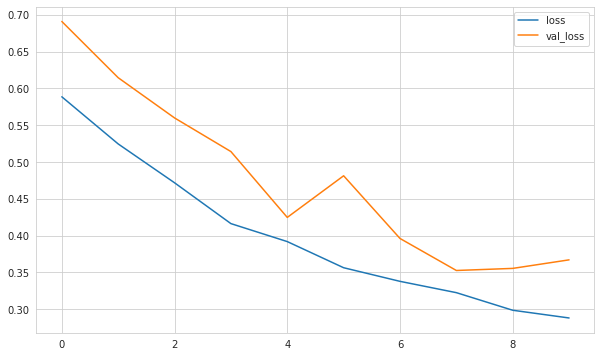

In [140]:
summary[["loss", "val_loss"]].plot();

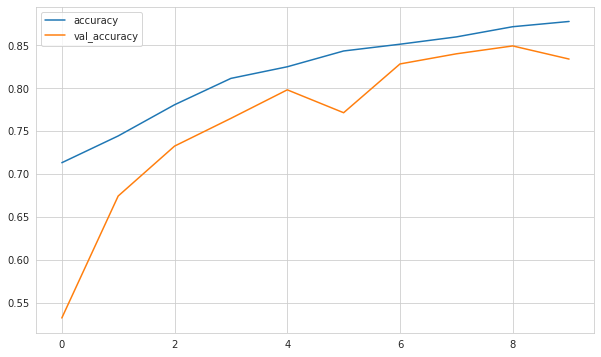

In [141]:
summary[["accuracy", "val_accuracy"]].plot();

In [142]:
score = model1.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 7s 92ms/step - loss: 0.3527 - accuracy: 0.8397
Test loss: 0.3527151346206665
Test accuracy: 0.8397380113601685


# Modelling-2

In [143]:
model2 = Sequential()

model2.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model2.add(BatchNormalization())
# BatchNormalization normalizes the output of the previous layer and forwards it to the next layer.
# z-score normalization
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dense(128))
model2.add(Activation('relu'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [144]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 32)       128       
 hNormalization)                                                 
                                                      

In [145]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [146]:
model2.fit(train_image_gen,
          epochs=20,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

Epoch 1/20
548/548 [==============================] - 119s 215ms/step - loss: 0.5574 - accuracy: 0.7393 - val_loss: 0.7027 - val_accuracy: 0.6393
Epoch 2/20
548/548 [==============================] - 116s 211ms/step - loss: 0.4547 - accuracy: 0.7912 - val_loss: 0.8895 - val_accuracy: 0.5952
Epoch 3/20
548/548 [==============================] - 119s 216ms/step - loss: 0.4049 - accuracy: 0.8199 - val_loss: 0.4656 - val_accuracy: 0.7790
Epoch 4/20
548/548 [==============================] - 116s 213ms/step - loss: 0.3650 - accuracy: 0.8385 - val_loss: 0.4477 - val_accuracy: 0.7939
Epoch 5/20
548/548 [==============================] - 118s 216ms/step - loss: 0.3254 - accuracy: 0.8584 - val_loss: 0.3678 - val_accuracy: 0.8445
Epoch 6/20
548/548 [==============================] - 117s 213ms/step - loss: 0.2939 - accuracy: 0.8714 - val_loss: 0.3638 - val_accuracy: 0.8507
Epoch 7/20
548/548 [==============================] - 114s 209ms/step - loss: 0.2649 - accuracy: 0.8903 - val_loss: 0.4321 -

In [147]:
summary = pd.DataFrame(model2.history.history)

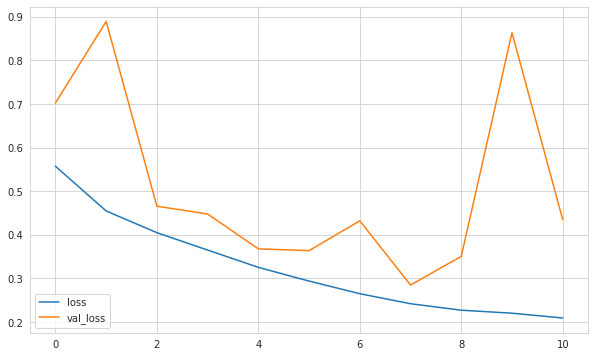

In [148]:
summary[["loss", "val_loss"]].plot();

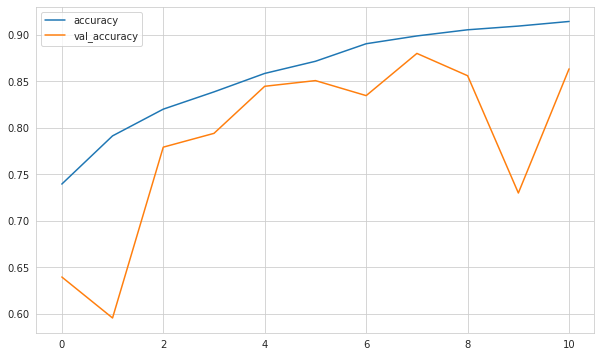

In [149]:
summary[["accuracy", "val_accuracy"]].plot();

In [151]:
score = model2.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 6s 89ms/step - loss: 0.2848 - accuracy: 0.8799
Test loss: 0.284835547208786
Test accuracy: 0.8799126744270325


# Modelling-3

In [268]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))

model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.1))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [269]:
model3.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_214 (Conv2D)         (None, 128, 128, 16)      448       
                                                                 
 batch_normalization_216 (Ba  (None, 128, 128, 16)     64        
 tchNormalization)                                               
                                                                 
 conv2d_215 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 batch_normalization_217 (Ba  (None, 128, 128, 16)     64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_124 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                     

In [270]:
early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights = True)

In [271]:
model3.fit(train_image_gen,
          epochs=50,
          steps_per_epoch=len(train_image_gen),
          validation_data=val_image_gen,
          validation_steps=len(val_image_gen),
          callbacks=[early_stop])

Epoch 1/50
548/548 [==============================] - 122s 221ms/step - loss: 0.6142 - accuracy: 0.7148 - val_loss: 1.0300 - val_accuracy: 0.5882
Epoch 2/50
548/548 [==============================] - 122s 222ms/step - loss: 0.5301 - accuracy: 0.7545 - val_loss: 0.5085 - val_accuracy: 0.7432
Epoch 3/50
548/548 [==============================] - 122s 223ms/step - loss: 0.4498 - accuracy: 0.7933 - val_loss: 0.4996 - val_accuracy: 0.7546
Epoch 4/50
548/548 [==============================] - 122s 223ms/step - loss: 0.3994 - accuracy: 0.8200 - val_loss: 0.4517 - val_accuracy: 0.7904
Epoch 5/50
548/548 [==============================] - 122s 223ms/step - loss: 0.3533 - accuracy: 0.8428 - val_loss: 0.4842 - val_accuracy: 0.7611
Epoch 6/50
548/548 [==============================] - 121s 220ms/step - loss: 0.3010 - accuracy: 0.8707 - val_loss: 0.3727 - val_accuracy: 0.8459
Epoch 7/50
548/548 [==============================] - 123s 224ms/step - loss: 0.2633 - accuracy: 0.8895 - val_loss: 0.4187 -

In [272]:
# model3.save('cat_dog_detector.h5')

In [273]:
summary = pd.DataFrame(model3.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.614,0.715,1.030,0.588
1,0.530,0.754,0.509,0.743
2,0.450,0.793,0.500,0.755
3,0.399,0.820,0.452,0.790
4,0.353,0.843,0.484,0.761


In [274]:
summary.tail()

,loss,accuracy,val_loss,val_accuracy
9,0.195,0.922,0.242,0.900
10,0.184,0.926,0.254,0.897
11,0.181,0.928,0.256,0.897
12,0.163,0.934,0.372,0.870
13,0.163,0.936,0.305,0.883


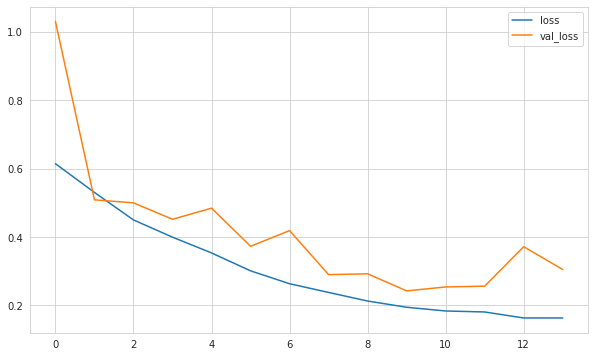

In [275]:
summary[["loss", "val_loss"]].plot();

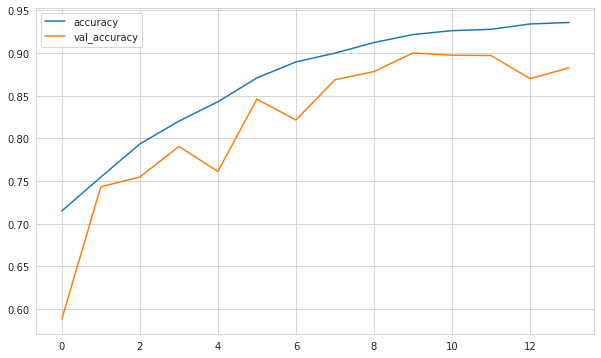

In [276]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [277]:
from sklearn.metrics import classification_report, confusion_matrix

In [278]:
score = model3.evaluate(val_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

72/72 [==============================] - 7s 92ms/step - loss: 0.2424 - accuracy: 0.9000
Test loss: 0.24242106080055237
Test accuracy: 0.8999999761581421


In [279]:
pred_prob = model3.predict(val_image_gen)
pred_prob

72/72 [==============================] - 7s 89ms/step


array([[0.00290631],
       [0.5338187 ],
       [0.04834723],
       ...,
       [0.9331166 ],
       [0.99982774],
       [0.99937004]], dtype=float32)

In [280]:
y_pred = pred_prob > 0.5
y_pred

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [281]:
y_test = val_image_gen.classes

In [282]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1219
           1       0.90      0.88      0.89      1071

    accuracy                           0.90      2290
   macro avg       0.90      0.90      0.90      2290
weighted avg       0.90      0.90      0.90      2290



In [283]:
confusion_matrix(y_test, y_pred)

array([[1118,  101],
       [ 128,  943]])

In [284]:
model3.save('cat_dog_detector.h5')  
# model3.save('/content/drive/MyDrive/cat_dog_data.h5')

# Prediction-1

In [286]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [287]:
model=load_model('cat_dog_detector.h5')

In [288]:
img_path = "/content/data/test/10005.jpg"

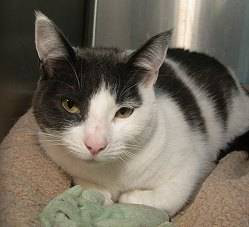

In [289]:
img=image.load_img(img_path)
img

In [290]:
img = np.array(img)

In [291]:
img.shape

(227, 249, 3)

In [292]:
resized_img = image.smart_resize(img, (128, 128)) # img has to be numpy array 
resized_img.shape

#resized_img = img.resize((128, 128)) # img has to be image format (like jpg, png etc)
#resized_img

(128, 128, 3)

In [293]:
resized_img.max()

254.4644

In [294]:
resized_img = resized_img / 255

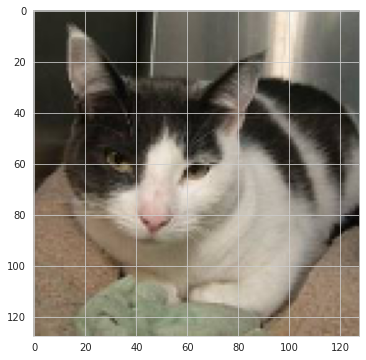

In [295]:
plt.imshow(resized_img)

In [296]:
resized_img=np.expand_dims(resized_img, axis=0)
resized_img.shape

(1, 128, 128, 3)

In [297]:
model.predict(resized_img)

1/1 [==============================] - 0s 382ms/step


array([[0.00033099]], dtype=float32)

In [298]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

# Prediction-2

In [299]:
random_image = random.sample(os.listdir(test_path), 1)
random_image

['3872.jpg']

In [300]:
image_path = test_path + "/" + random_image[0]
image_path

'data/test//3872.jpg'

In [301]:
my_image = image.load_img(image_path, target_size=image_shape)

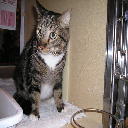

In [302]:
my_image

In [303]:
type(my_image)

PIL.Image.Image

In [304]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [305]:
my_image.max()

255.0

In [306]:
my_image = my_image / 255

In [307]:
my_image.shape

(128, 128, 3)

In [308]:
my_image = np.expand_dims(my_image, axis=0)

In [309]:
my_image.shape

(1, 128, 128, 3)

In [310]:
model.predict(my_image)

1/1 [==============================] - 0s 19ms/step


array([[0.00456025]], dtype=float32)

In [ ]:
train_image_gen.class_indices

In [312]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    random_image = random.sample(os.listdir(test_path), 1)
    img_path = test_path  + random_image[0]
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)
    if img.max() > 1:
        img = img/255
  
    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 [==============================] - 0s 15ms/step
prediction_probability:  5.096035e-05


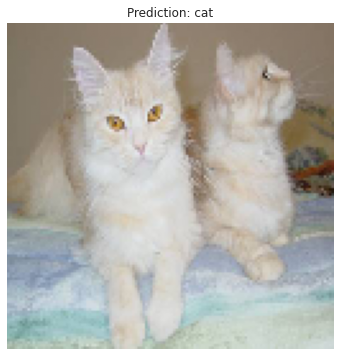

In [313]:
pred_and_plot(model, image_shape[:2])